<a href="https://colab.research.google.com/github/rebuyguy2000/ex-date-payday-public/blob/main/yfinance_dividend_price_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dividend scraper code
#goal is to screen and purchase high paying dividend instruments using a modified dividend capture strategy
# step 1. capture all dividend ex-dates on Nasdaq Dividend Calendar website
# step 2. parse the symbols and ex-dates into a csv file
# step 3. extract historical prices for all symbols that includes 7 days plus/minus the ex-date
# step 4. use pricing data for statistical analysis on each symbol
# step 5. is there a correlation between price increase in the days leading up to the ex-date?
# step 6. how many days leading up to the ex-date are price changes relevant?

In [ ]:
# install yfinance data api for python
# code reference https://pypi.org/project/yfinance/

!pip install yfinance

In [4]:
# import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import csv
import matplotlib.pyplot as plt
from pandas_datareader import data


In [23]:
# initialize global variables

ticker = 'WHF'
s_ema = pd.DataFrame()
m_ema = pd.DataFrame()


In [ ]:
# initialize ticker variable
# retrieves all dividend and stock splits for ticker

symbol = yf.Ticker(ticker)
symbol.actions

In [ ]:
# retrieves dividend and payout history for ticker

data.DataReader(ticker, 'yahoo-actions')

In [26]:
# download ticker info by date range into dataframe
# estimating a 30 day window for price history

start_d = '2021-02-11'
end_d = '2021-03-18'

df_yahoo = yf.download(ticker, start=start_d, end=end_d,progress=False,auto_adjust=True,actions="inline")

In [27]:
# moving average calculations
# based on estimated 30 day moving window of price history

ShortEMA = df_yahoo.Close.ewm(span=2, adjust=True).mean()
MediumEMA = df_yahoo.Close.ewm(span=10, adjust=True).mean()

#MediumEMA
#ShortEMA

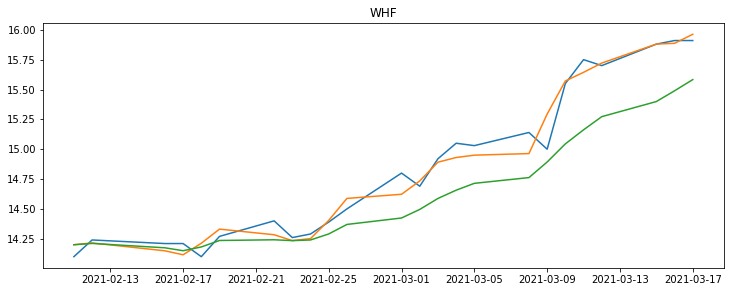

In [28]:
# plot line graph
# blue is 'Open' prices
# orange is ShortEMA
# green is MediumEMA

plt.figure(figsize=(12.2,4.5))
plt.plot(df_yahoo['Open'])
plt.plot(ShortEMA)
plt.plot(MediumEMA)
plt.title(ticker)
plt.show()

In [43]:
# moving average calculations
# convert to dataframes, combine columns short/medium
# build algorithm to track upward or downward trend

ShortEMA = df_yahoo.Close.ewm(span=2, adjust=True).mean()
MediumEMA = df_yahoo.Close.ewm(span=10, adjust=True).mean()

s_ema = ShortEMA
m_ema = MediumEMA

df_yahoo.info()
#print(df_yahoo["Open"])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-02-11 to 2021-03-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24 non-null     float64
 1   High          24 non-null     float64
 2   Low           24 non-null     float64
 3   Close         24 non-null     float64
 4   Volume        24 non-null     int64  
 5   Dividends     24 non-null     int64  
 6   Stock Splits  24 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.5 KB
